In [1]:
###### import numpy as np
import scipy as scipy
import scipy.special

In [2]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
# import os
from Visualization import *
from Auto_Algorithm import *
import csv
import random
import statistics
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator



# virtual scan

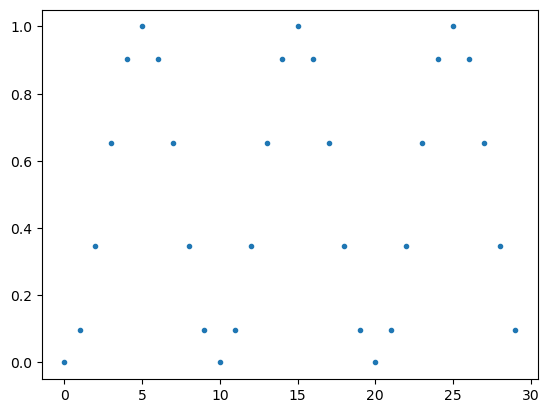

In [3]:
# results = np.zeros((steps+1, 2**nqubit));
Set_Mapping([2,1]);
nqubit = 2

S1=Quantum_Circuit(nqubit,"Ramsey")
statef=S1.Simulate()
p=0
# p_list=[]
# scan_list=[]
# mylist=[2,3,4,5,11,12,13,14,19,20,21,22]
d=[96]
duration=3 # scan for  3 flops which is 6pi
ptsperflop=10
pop_plot=[]
for i in d:
    for s in range (duration*ptsperflop):
        S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))
        
        for j in range(i):
            S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
            S1.Add_Gate(Quantum_Gate("SKAY",0,angle=1))
            S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
        S1.Add_Gate(Quantum_Gate("RA",0,axis=2/ptsperflop*s,angle=0.5))
    
    
        statef=S1.Simulate()
        # print (S1.GatesLab_Sequence())
        p=statef.population[0]    # print (statef.population)
        pop_plot.append(p)
        # p_list.append(p)
        S1.gates=[]
        S1.depth=0
    

# print (p_list)
# plt.figure()
# plt.title("parity")
plt.plot(pop_plot,".")
# print (scan_list)

# Virtual scan with AWGwait

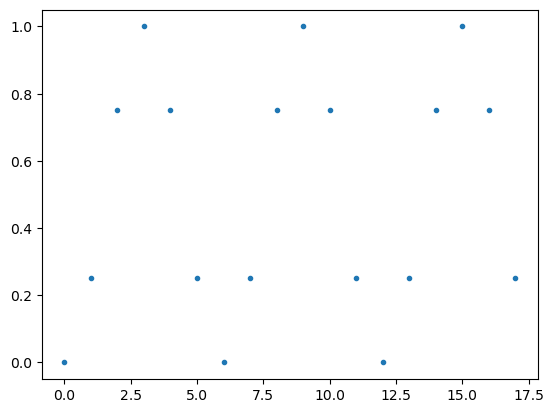

In [24]:
# results = np.zeros((steps+1, 2**nqubit));
Set_Mapping([2,1]);
nqubit = 2

S1=Quantum_Circuit(nqubit,"Ramsey")
statef=S1.Simulate()
p=0


d=[160] #number of AWGwait gates
DD_freq=75 #duration of each AWGwait gate

duration=3 # scan for  3 flops which is 6pi
ptsperflop=6
pop_plot=[]

circuits={}
circuits["info"]="AWGwait"+str(DD_freq)+"us"
for i in d:
    circuits[i]=[]
    for s in range (duration*ptsperflop):
        S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))
        
        for j in range(int(i/2)):
            S1.Add_Gate(Quantum_Gate("AWGwait",duration=DD_freq))
            # S1.Add_Gate(Quantum_Gate("SKAY",0,angle=1))
            S1.Add_Gate(Quantum_Gate("AWGwait",duration=DD_freq))
        S1.Add_Gate(Quantum_Gate("RA",0,axis=2/ptsperflop*s,angle=0.5))

        statef=S1.Simulate()
        circuits[i].append(S1.GatesLab_Sequence())

        p=statef.population[0]    # print (statef.population)
        pop_plot.append(p)
        # p_list.append(p)
        S1.gates=[]
        S1.depth=0
    plt.plot(pop_plot,".")
    pop_plot=[]

# print (p_list)
# plt.figure()
# plt.title("parity")
# plt.plot(pop_plot,".")
# print (scan_list)

In [26]:
# print (circuits[16][0])
# print (all_circuits_explicit[0])
# for pauli_sample in pauli_sample_list:
pathname="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/Ramsey/virtual scan/with AWGwait/AWGwait75us/"
for i in d:
    cricfname=circuits["info"]+str(i)+"gates"+".txt"
    with open(pathname+cricfname, "w") as text_file:
        for line in circuits[i]:
            text_file.write(line+"\n")

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3875, in atexit_operations
    self._atexit_once()
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3854, in _atexit_once
    self.reset(new_session=False)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1373, in reset
    self.history_manager.reset(new_session)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/history.py", line 597, in reset
    self.dir_hist[:] = [Path.cwd()]
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/pathlib.py", line 1096, in cwd
    return cls(os.getcwd())
FileNotFoundError: [Errno 2] No such file or directory


# continuous scan 

set a 250Hz detuning in the phase counting frequency. Take one data point per + ~600us delay time.

Use the AWG delay gate. 


## each XX gate is 75us (= DD pulse every 150us). 

In [8]:
# results = np.zeros((steps+1, 2**nqubit));
Set_Mapping([2,1]);
nqubit = 2

S1=Quantum_Circuit(nqubit,"Ramsey")
statef=S1.Simulate()
p=0
# p_list=[]
# scan_list=[]
# mylist=[2,3,4,5,11,12,13,14,19,20,21,22]
d=[160]

duration=3 # scan for  3 flops which is 6pi
ptsperflop=10
pop_plot=[]
for i in range (int(160/4)):
    # for s in range (duration*ptsperflop):
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))
    
    for j in range(4*i):
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
        S1.Add_Gate(Quantum_Gate("SKAY",0,angle=1))
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))


    statef=S1.Simulate()
    print (S1.GatesLab_Sequence())
    p=statef.population[0]    # print (statef.population)
    pop_plot.append(p)
    # p_list.append(p)
    S1.gates=[]
    S1.depth=0
    


# plt.plot(pop_plot,".")


SKAX2+0.5000:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.

## each XX gate is 150us (= DD pulse every 300us). 

In [9]:
# results = np.zeros((steps+1, 2**nqubit));
Set_Mapping([2,1]);
nqubit = 2

S1=Quantum_Circuit(nqubit,"Ramsey")
statef=S1.Simulate()
p=0
# p_list=[]
# scan_list=[]
# mylist=[2,3,4,5,11,12,13,14,19,20,21,22]
# d=[96]

duration=3 # scan for  3 flops which is 6pi
ptsperflop=10
pop_plot=[]
for i in range (int(80/2)):
    # for s in range (duration*ptsperflop):
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))
    
    for j in range(2*i):
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
        S1.Add_Gate(Quantum_Gate("SKAY",0,angle=1))
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))


    statef=S1.Simulate()
    print (S1.GatesLab_Sequence())
    p=statef.population[0]    # print (statef.population)
    pop_plot.append(p)
    # p_list.append(p)
    S1.gates=[]
    S1.depth=0
    


# plt.plot(pop_plot,".")


SKAX2+0.5000:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.

# each delay 300us

In [10]:
# results = np.zeros((steps+1, 2**nqubit));
Set_Mapping([2,1]);
nqubit = 2

S1=Quantum_Circuit(nqubit,"Ramsey")
statef=S1.Simulate()
p=0

pop_plot=[]
for i in range (40):
    # for s in range (duration*ptsperflop):
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))
    
    for j in range(2*i):
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
        S1.Add_Gate(Quantum_Gate("SKAY",0,angle=1))
        S1.Add_Gate(Quantum_Gate("XA",0,1,angle=0.0001))
    S1.Add_Gate(Quantum_Gate("SKAX",0,angle=0.5))


    statef=S1.Simulate()
    print (S1.GatesLab_Sequence())
    p=statef.population[0]    # print (statef.population)
    pop_plot.append(p)
    # p_list.append(p)
    S1.gates=[]
    S1.depth=0
    


# plt.plot(pop_plot,".")


SKAX2+0.5000:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:SKAX2+0.5000
SKAX2+0.5000:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.0001+:SKAY2+1.0000:XA210.0001+:XA210.